<a href="https://colab.research.google.com/github/Xicotrainer/Python/blob/master/2_2_Limpieza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

##  1 Carga de librerias, accesos y configuraciones.
___

In [18]:
# Si requieres instalar una libreria, solo aplica esta sentencia:
#       %pip install <library>.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
sns.set_context("talk")

In [20]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/1_Datasets
1.1_input_dataset.csv  1.2_sample_dataset.csv


In [21]:
df = pd.read_csv('1.2_sample_dataset.csv', index_col=0)

___
___

## 2 Primer acercamiento
___

In [22]:
df.head(3)

,Id,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,1,NaN,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,Scholastic Inc.,4.57,652,28062,2006
1,2,0439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Scholastic Inc.,4.50,870,29770,2004
2,3,NaN,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Scholastic Inc,4.47,309,75911,2003


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18455 entries, 0 to 18454
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              18455 non-null  int64  
 1   ISBN            18174 non-null  object 
 2   Name            18455 non-null  object 
 3   Authors         18455 non-null  object 
 4   Publisher       18302 non-null  object 
 5   Rating          18455 non-null  float64
 6   pagesNumber     18455 non-null  int64  
 7   CountsOfReview  18455 non-null  int64  
 8   PublishYear     18455 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.4+ MB


In [24]:
df.describe()

,Id,Rating,pagesNumber,CountsOfReview,PublishYear
count,18455.000000,18455.000000,18455.000000,18455.000000,18455.000000
mean,45871.197507,3.927956,329.434950,419.530046,1999.674397
std,29470.577550,0.367937,234.618885,2181.676230,15.893882
min,1.000000,0.000000,0.000000,0.000000,162.000000
25%,19389.000000,3.770000,196.000000,9.000000,1997.000000
50%,43128.000000,3.960000,292.000000,43.000000,2002.000000
75%,72662.500000,4.130000,400.000000,194.000000,2005.000000
max,99986.000000,5.000000,6576.000000,94850.000000,2020.000000


In [25]:
df.nunique()/df.shape[0]*100

Id                99.599025
ISBN              98.076402
Name              98.515308
Authors           42.292062
Publisher         15.908968
Rating             1.246275
pagesNumber        5.960444
CountsOfReview    11.286914
PublishYear        0.514766
dtype: float64

In [26]:
(df == 0).sum()/df.shape[0]*100

Id                0.000000
ISBN              0.000000
Name              0.000000
Authors           0.000000
Publisher         0.000000
Rating            0.287185
pagesNumber       0.525603
CountsOfReview    5.250610
PublishYear       0.000000
dtype: float64

>**Revisión preliminar**.
 
El dataset contiene 18 mil registros y 8 variables, en cuanto a las variables categoricas muestran:
* Registros nulos en ISBN y Publisher.
* Repetidos en ISBN, hay que retirarlos duplicado por se un Idintificador.
* Repetidos en Name, no impacta mucho al no ser un ID.

En cuanto a la variables numericas presentan consistencia al mostrar solo valores positivos, no obstante:
* El máximo de pagesNumber es mucho mayor que el percentil 75.
* El 5% de countsOfReview son cero.
* La fecha de publicación más antigua es 162, es probable que sea un error.  


___
___

## 3 Limpieza de los datos
___

### 3.1 Gestión de datos nulos 

In [27]:
# porcentaje de datos por columna

df.isnull().sum()/df.shape[0]*100

Id                0.000000
ISBN              1.522623
Name              0.000000
Authors           0.000000
Publisher         0.829044
Rating            0.000000
pagesNumber       0.000000
CountsOfReview    0.000000
PublishYear       0.000000
dtype: float64

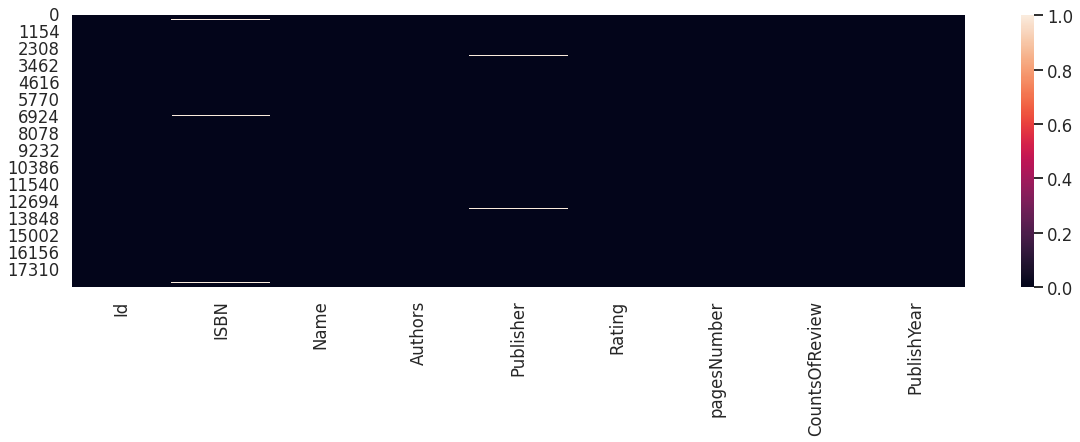

In [28]:
# Modo gráfico

plt.figure(figsize = (20,5))
sns.set_style("dark")
sns.heatmap(df.isnull())

In [29]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18023 entries, 1 to 18454
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              18023 non-null  int64  
 1   ISBN            18023 non-null  object 
 2   Name            18023 non-null  object 
 3   Authors         18023 non-null  object 
 4   Publisher       18023 non-null  object 
 5   Rating          18023 non-null  float64
 6   pagesNumber     18023 non-null  int64  
 7   CountsOfReview  18023 non-null  int64  
 8   PublishYear     18023 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.4+ MB


> El dataset conserva 98% de los registros sin los registros nulos.

### 3.2 Gestión de datos duplicados

In [30]:
df[df['ISBN'].duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 14494 to 16273
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              71 non-null     int64  
 1   ISBN            71 non-null     object 
 2   Name            71 non-null     object 
 3   Authors         71 non-null     object 
 4   Publisher       71 non-null     object 
 5   Rating          71 non-null     float64
 6   pagesNumber     71 non-null     int64  
 7   CountsOfReview  71 non-null     int64  
 8   PublishYear     71 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 5.5+ KB


In [36]:
df.drop(df[df['ISBN'].duplicated()].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17952 entries, 1 to 18454
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17952 non-null  int64  
 1   ISBN            17952 non-null  object 
 2   Name            17952 non-null  object 
 3   Authors         17952 non-null  object 
 4   Publisher       17952 non-null  object 
 5   Rating          17952 non-null  float64
 6   pagesNumber     17952 non-null  int64  
 7   CountsOfReview  17952 non-null  int64  
 8   PublishYear     17952 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.4+ MB


In [37]:
df.nunique()/df.shape[0]*100

Id                100.000000
ISBN              100.000000
Name               98.969474
Authors            42.964572
Publisher          16.165330
Rating              1.281194
pagesNumber         6.016043
CountsOfReview     11.235517
PublishYear         0.529189
dtype: float64

> El dataset conserva 97% de los registros sin los registros repetidos (y/o nulos).

### 2.4 Atípicos

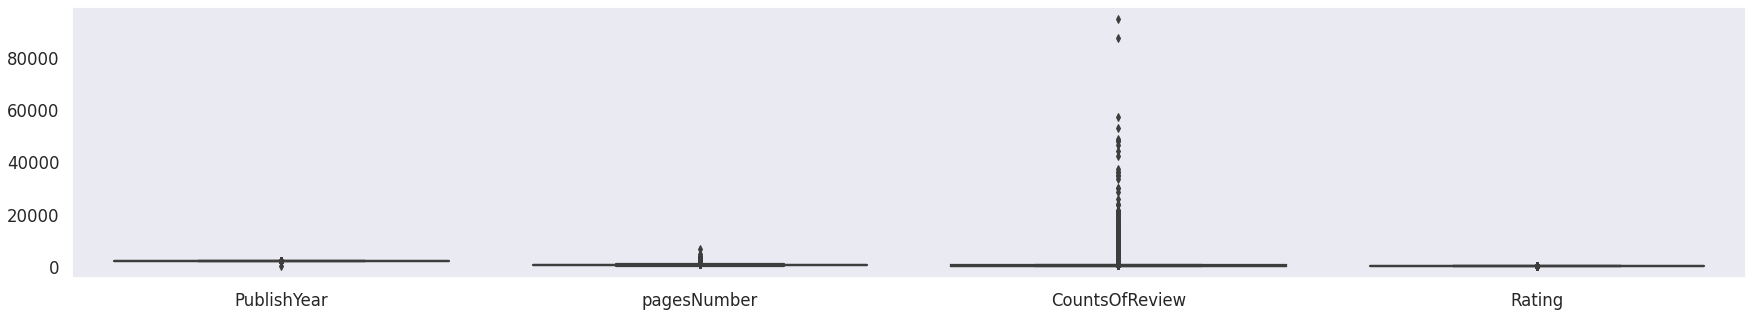

In [38]:
num_df = df[list(df.columns[df.dtypes != object])]

plt.figure(figsize = (30,5))
sns.boxplot(data=num_df,order=['PublishYear', 'pagesNumber', 'CountsOfReview', 'Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


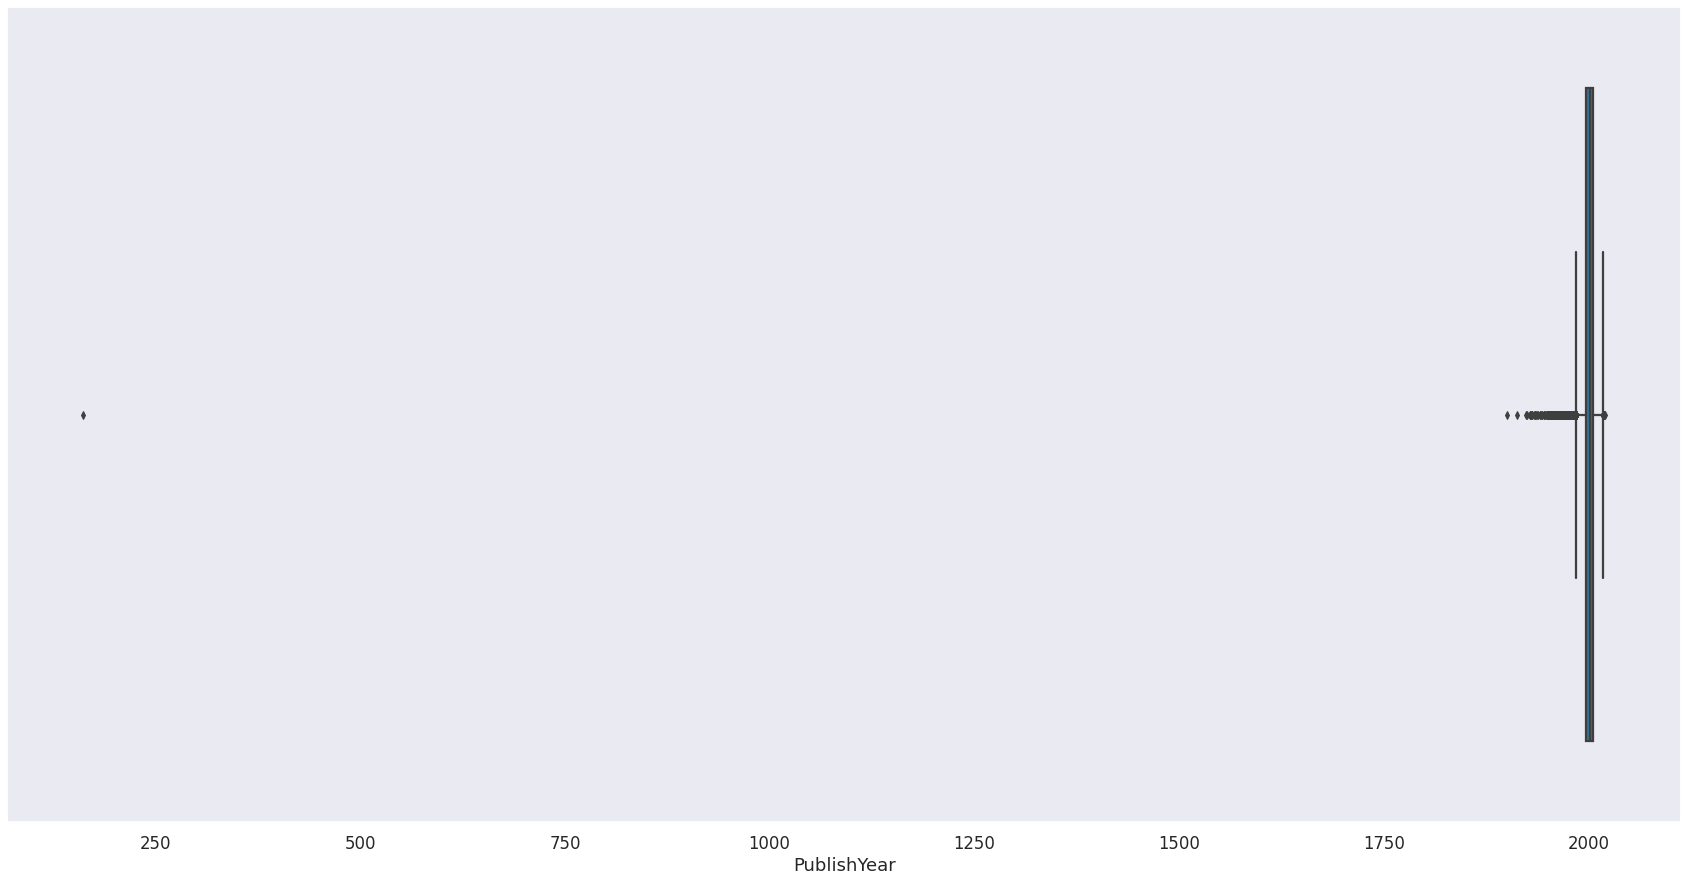

In [39]:
plt.figure(figsize = (30,15))
sns.boxplot(num_df['PublishYear'])

In [ ]:
Q1 = df['PublishYear'].quantile(0.25)
Q3 = df['PublishYear'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
df[df['PublishYear'] > (Q3+1.5*IQR)].sort_values(by='PublishYear', ascending=True)

,ISBN,Name,Authors,Publisher,PublishYear,pagesNumber,CountsOfReview,Rating
Id,,,,,,,,
53703,9682707951,México negro,Francisco Martín Moreno,Planeta Editorial Mexicana,2018,631,9,3.95
94691,0231103204,This Mad Masquerade,Gaylyn Studlar,Columbia University Press,2018,320,0,3.69
54042,0802151175,Malone Dies,Samuel Beckett,Grove Press,2018,120,132,3.87
58407,8432216097,En busca de Klingsor,Jorge Volpi,Planeta Publishing,2018,444,65,3.88
59797,0802132405,Little Wilson and Big God,Anthony Burgess,Grove Press,2018,460,13,4.12
62937,8495971267,Trafalgar,José Luis Corral,Planeta Publishing,2018,488,5,3.45
63698,8423918505,El alcalde de Zalamea,Pedro Calderón de la Barca,Planeta Publishing,2018,178,1,3.51
63730,0871131978,Zoo Station,Ian Walker,Grove Press,2018,329,4,4.17
64737,0843955538,Grave Intent,Deborah Leblanc,LeBlanc Laboratories,2018,374,20,3.78


In [ ]:
df[df['PublishYear'] < (Q1-1.5*IQR)].sort_values(by='PublishYear', ascending=True)

,ISBN,Name,Authors,Publisher,PublishYear,pagesNumber,CountsOfReview,Rating
Id,,,,,,,,
76978,0448089033,"The Secret of the Old Mill (The Hardy Boys, #3)",Franklin W. Dixon,Grosset & Dunlap,162,174,209,3.86
98367,0781208378,Lives Of James Madison & James Monroe (The Wor...,John Quincy Adams,Reprint Services Corp,1850,432,0,4.50
90032,0804837856,Advanced Aikido,Phong Thong Dang,Tuttle Publishing,1900,224,0,3.76
37134,0753812932,Consider the Lilies,Iain Crichton Smith,Polygon,1900,144,36,3.88
5070,1904598323,Last Orders at Harrods: An African Tale,Michael Holman,Polygon,1900,279,1,3.23
...,...,...,...,...,...,...,...,...
78932,0517543273,Snow White and the Seven Dwarfs,Walt Disney Company,Harmony,1984,128,0,4.19
25759,0671524062,Fun House Terrors!,Hilary H. Milton,Wanderer Books,1984,118,0,0.00
57137,0879978996,The Book of Shai,Daniel Walther,DAW,1984,160,1,2.71


In [ ]:
num_df = df[list(df.columns[df.dtypes != object])]

for col in num_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df[f'flag_{col}'] = ~((df['PublishYear'] < (Q1 - 1.5 * IQR)) | (df['PublishYear'] > (Q3 + 1.5 * IQR)))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57083 entries, 2 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 57083 non-null  object 
 1   Name                 57083 non-null  object 
 2   Authors              57083 non-null  object 
 3   Publisher            57083 non-null  object 
 4   PublishYear          57083 non-null  int64  
 5   pagesNumber          57083 non-null  int64  
 6   CountsOfReview       57083 non-null  int64  
 7   Rating               57083 non-null  float64
 8   flag_PublishYear     57083 non-null  bool   
 9   flag_pagesNumber     57083 non-null  bool   
 10  flag_CountsOfReview  57083 non-null  bool   
 11  flag_Rating          57083 non-null  bool   
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 4.1+ MB


In [ ]:
df.sample(3)

,ISBN,Name,Authors,Publisher,PublishYear,pagesNumber,CountsOfReview,Rating,flag_PublishYear,flag_pagesNumber,flag_CountsOfReview,flag_Rating
Id,,,,,,,,,,,,
4646,0670865958,The Funky Squad Annual,Santo Cilauro,Viking Books,1995,168,2,4.00,False,True,True,True
24563,0670889326,Magic Movie Moments,George Perry,Studio,2000,176,1,4.00,False,True,True,True
57281,1416509321,"Boundary (Boundary, #1)",Eric Flint,Baen Books,2006,457,68,3.92,False,True,True,True


In [ ]:
ind_out = df[df['flag_PublishYear']].index
df.drop(ind_out, inplace=True)
df.shape

(54075, 12)

In [ ]:
# ind_out = df[df['flag_pagesNumber']].index
# df.drop(ind_out, inplace=True)
# df.shape

# ind_out = df[df['flag_CountsOfReview']].index
# df.drop(ind_out, inplace=True)
# df.shape

# ind_out = df[df['flag_Rating']].index
# df.drop(ind_out, inplace=True)
# df.shape


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54075 entries, 2 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 54075 non-null  object 
 1   Name                 54075 non-null  object 
 2   Authors              54075 non-null  object 
 3   Publisher            54075 non-null  object 
 4   PublishYear          54075 non-null  int64  
 5   pagesNumber          54075 non-null  int64  
 6   CountsOfReview       54075 non-null  int64  
 7   Rating               54075 non-null  float64
 8   flag_PublishYear     54075 non-null  bool   
 9   flag_pagesNumber     54075 non-null  bool   
 10  flag_CountsOfReview  54075 non-null  bool   
 11  flag_Rating          54075 non-null  bool   
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 3.9+ MB


In [ ]:
df.columns

Index(['ISBN', 'Name', 'Authors', 'Publisher', 'PublishYear', 'pagesNumber',
       'CountsOfReview', 'Rating', 'flag_PublishYear', 'flag_pagesNumber',
       'flag_CountsOfReview', 'flag_Rating'],
      dtype='object')

In [ ]:
df = df.drop(columns=['ISBN','flag_PublishYear', 'flag_pagesNumber', 'flag_CountsOfReview', 'flag_Rating'])

In [ ]:
df.to_csv('1.2_clean_dataset.csv')

___
___